In [1]:
import os
import cv2
import time

import tensorflow as tf 
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import PIL

import tensorflow_datasets as tfds

In [2]:
IMG_SIZE = 160

def formatImage(image):
    image = tf.cast(image , tf.float32)
    image = (image/127.5) - 1
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return image

def formatDataset(image, label):
    image = tf.cast(image , tf.float32)
    image = (image/127.5) - 1
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return image , label

model = tf.keras.models.load_model('RoadSignRecognition.h5')
classNames = pd.read_csv('Dataset/NomiSegnali.csv')

In [5]:
changeClassNumberList = [
    0,
    1,
    10,
    11,
    12,
    13,
    14,
    15,
    16,
    17,
    18,
    19,
    2,
    20,
    21,
    22,
    23,
    24,
    25,
    26,
    27,
    28,
    29,
    3,
    30,
    31,
    32,
    33,
    34,
    35,
    36,
    37,
    38,
    39,
    4,
    40,
    41,
    42,
    5,
    6,
    7,
    8,
    9
]

In [6]:
# Avviare questa porzione di codice esclusivamente nel caso in cui le immagini di validazione devono ancora essere sottoposte a compressione

for i in range(0,43):
    os.mkdir('Dataset/ValidationJPEGCompressed2%/' + str(i))
    os.mkdir('Dataset/ValidationJPEGCompressed4%/' + str(i))
    os.mkdir('Dataset/ValidationJPEGCompressed5%/' + str(i))
    os.mkdir('Dataset/ValidationJPEGCompressed6%/' + str(i))
    os.mkdir('Dataset/ValidationJPEGCompressed8%/' + str(i))
    os.mkdir('Dataset/ValidationJPEGCompressed10%/' + str(i))

In [7]:
# Avviare questa porzione di codice esclusivamente nel caso in cui le immagini di validazione devono ancora essere sottoposte a compressione

builder = tfds.folder_dataset.ImageFolder('Dataset/')
raw_dataset =  builder.as_dataset(split='Validation' , as_supervised=True)

imageNumberList = [0 for i in range(0,43)]

for item in raw_dataset:
    im = PIL.Image.fromarray(item[0].numpy())
    classNumber = item[1].numpy()
    
    classNumber = changeClassNumberList[classNumber]

    imageNumber = imageNumberList[classNumber]

    im.save('Dataset/ValidationJPEGCompressed2%/'+ str(classNumber) + '/' + str(imageNumber) + '.jpg' , format='JPEG' , quality=98 , subsampling=0)
    im.save('Dataset/ValidationJPEGCompressed4%/'+ str(classNumber) + '/' + str(imageNumber) + '.jpg' , format='JPEG' , quality=96 , subsampling=0)
    im.save('Dataset/ValidationJPEGCompressed5%/'+ str(classNumber) + '/' + str(imageNumber) + '.jpg' , format='JPEG' , quality=95 , subsampling=0)
    im.save('Dataset/ValidationJPEGCompressed6%/'+ str(classNumber) + '/' + str(imageNumber) + '.jpg' , format='JPEG' , quality=94 , subsampling=0)
    im.save('Dataset/ValidationJPEGCompressed8%/'+ str(classNumber) + '/' + str(imageNumber) + '.jpg' , format='JPEG' , quality=92 , subsampling=0)
    im.save('Dataset/ValidationJPEGCompressed10%/'+ str(classNumber) + '/' + str(imageNumber) + '.jpg' , format='JPEG' , quality=90 , subsampling=0)

    imageNumberList[classNumber] = imageNumberList[classNumber] + 1

In [49]:
# Porzione di codice utilizzata per il calcolo dell'accuratezza della rete neurale (utilizzare solo se non di dispone dei valori di accuratezza)

accuracyList = []
folderNameList = ['Validation', 'ValidationJPEGCompressed2%' , 'ValidationJPEGCompressed4%' , 'ValidationJPEGCompressed5%' , 'ValidationJPEGCompressed6%' , 'ValidationJPEGCompressed8%' , 'ValidationJPEGCompressed10%']

builder = tfds.folder_dataset.ImageFolder('Dataset/')

for i in range(0,7):
    raw_dataset = builder.as_dataset(split=folderNameList[i] , as_supervised=True )
    dataset = raw_dataset.map(formatDataset)
    validation_batches = dataset.batch(32)
    loss0 , val0 = model.evaluate(validation_batches)    
    accuracyList.append(val0)

print(accuracyList)

246/246 [==============================] - 174s 707ms/step - loss: 0.3074 - accuracy: 0.8949
[0.9557510614395142, 0.94108647108078, 0.9335628747940063, 0.9246365427970886, 0.9205560088157654, 0.9038510322570801, 0.8949247598648071]


In [3]:
accuracyList = [0.9558 , 0.9411 , 0.9336 , 0.9246 , 0.9206 , 0.9039 , 0.8949]

In [3]:
cpuCyclesList = []
cpuFrequency = 1.9 * 10**9

filePathRaw = 'Dataset/Validation/14/4.png'
filePathCompressed2 = 'Dataset/ValidationJPEGCompressed2%/14/130.jpg'
filePathCompressed4 = 'Dataset/ValidationJPEGCompressed4%/14/130.jpg'
filePathCompressed5 = 'Dataset/ValidationJPEGCompressed5%/14/130.jpg'
filePathCompressed6 = 'Dataset/ValidationJPEGCompressed6%/14/130.jpg'
filePathCompressed8 = 'Dataset/ValidationJPEGCompressed8%/14/130.jpg'
filePathCompressed10 = 'Dataset/ValidationJPEGCompressed10%/14/130.jpg'

filePathList = [filePathRaw , filePathCompressed2 , filePathCompressed4 , filePathCompressed5 , filePathCompressed6 , filePathCompressed8 , filePathCompressed10]

plt.rcParams.update({'font.size': 10})

In [5]:
cpuCyclesMean = 389520150

(-0.5, 62.5, 62.5, -0.5)

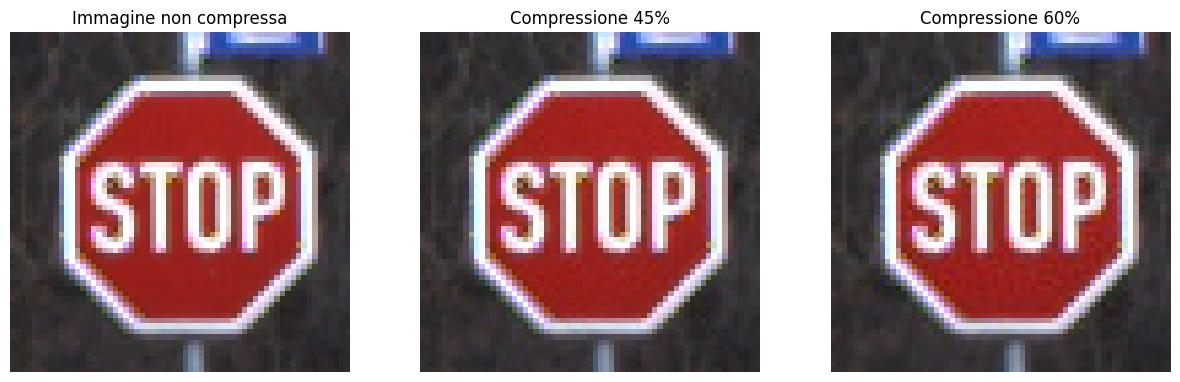

In [6]:
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
plt.imshow(mpimg.imread(filePathList[0]))
plt.title('Immagine non compressa')
plt.axis('off')
plt.subplot(3,3,2)
plt.imshow(mpimg.imread(filePathList[3]))
plt.title('Compressione 45%')
plt.axis('off')
plt.subplot(3,3,3)
plt.imshow(mpimg.imread(filePathList[6]))
plt.title('Compressione 60%')
plt.axis('off')

In [6]:
predictionList = []
imageSizeList = []
indexList = [0,3,6]

for i in range(0,7):
    if(indexList.count(i) > 0 ):
        image = cv2.imread(filePathList[i])
        image = formatImage(image)
        image = tf.keras.preprocessing.image.img_to_array(image)
        image = image.reshape((1,) + image.shape)

        predictions = model.predict(image)
        class_predicted = np.argmax(predictions)

        predictionList.append((class_predicted , predictions))
    else:
        predictionList.append(0)

    N = os.path.getsize(filePathList[i])
    print(N)
    N_Mb = N/(1024*1024)

    imageSizeList.append(N_Mb)


print('Dimensione immagine non compressa (Mb): {} '.format(imageSizeList[0]))
print('Dimensione immagine con compressione del 2% (Mb): {} '.format(imageSizeList[1]))
print('Dimensione immagine con compressione del 4% (Mb): {} '.format(imageSizeList[2]))
print('Dimensione immagine con compressione del 5% (Mb): {} '.format(imageSizeList[3]))
print('Dimensione immagine con compressione del 6% (Mb): {} '.format(imageSizeList[4]))
print('Dimensione immagine con compressione del 8% (Mb): {} '.format(imageSizeList[5]))
print('Dimensione immagine con compressione del 10% (Mb): {} '.format(imageSizeList[6]))
print('Cpu cycles necessari (media): {}'.format(cpuCyclesMean))

1/1 [==============================] - 2s 2s/step
8060
6074
4853
1/1 [==============================] - 0s 80ms/step
4366
4016
3464
1/1 [==============================] - 0s 66ms/step
3191
Dimensione immagine non compressa (Mb): 0.007686614990234375 
Dimensione immagine con compressione del 2% (Mb): 0.0057926177978515625 
Dimensione immagine con compressione del 4% (Mb): 0.004628181457519531 
Dimensione immagine con compressione del 5% (Mb): 0.0041637420654296875 
Dimensione immagine con compressione del 6% (Mb): 0.0038299560546875 
Dimensione immagine con compressione del 8% (Mb): 0.00330352783203125 
Dimensione immagine con compressione del 10% (Mb): 0.0030431747436523438 
Cpu cycles necessari (media): 389520150


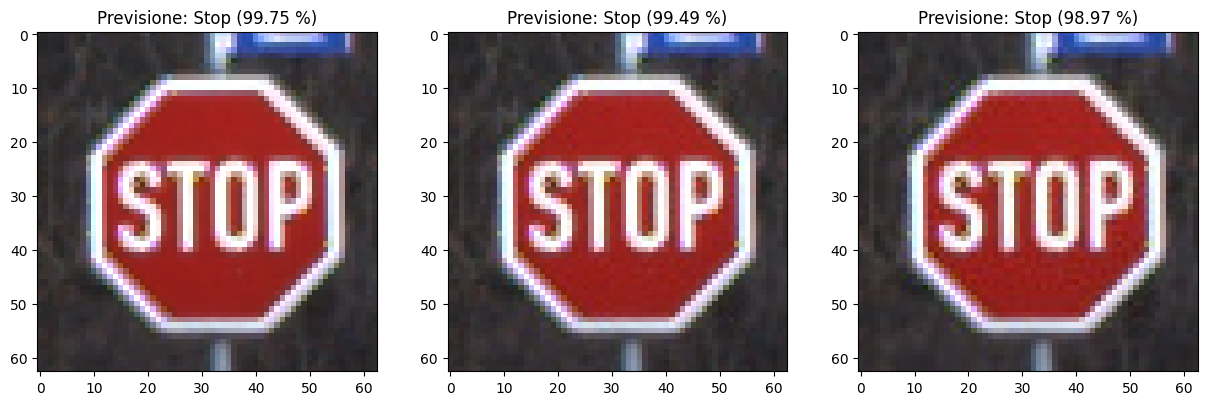

In [7]:
plt.figure(figsize=(15,15))
j=0
for i in indexList:
    image = mpimg.imread(filePathList[i])
    plt.subplot(3,3,j+1)
    plt.title('Previsione: ' + classNames.loc[classNames['ClassId'] == predictionList[i][0] , 'SignName'].values[0] + " (" + str(round(predictionList[i][1][0][predictionList[i][0]] * 100 , 2 )) + ' %)')
    plt.imshow(image)
    j += 1



## PROBLEMA DI OTTIMIZZAZIONE

PathLoss in dB: 85.65515663363148
PathLoss scalare:  367718655.36336696
Attenuazione di canale:  2.719470403294699e-09
Potenza di rumore: 1.1943215116604957e-13 Watt
Cpu cycles necessari: 389520150.0 Cpu-cycles
Banda :30000000 Hz
Num bit: 64480.0 bit
Rapporto segnale rumore max:  2277.000268975939
Tempo esecuzione server: 0.038952015 s
Tempo trasmissione: 0.0001927039291515868 s
Valore minimo di L: 0.039144718929151584 s




PathLoss in dB: 85.65515663363148
PathLoss scalare:  367718655.36336696
Attenuazione di canale:  2.719470403294699e-09
Potenza di rumore: 1.1943215116604957e-13 Watt
Cpu cycles necessari: 389520150.0 Cpu-cycles
Banda :30000000 Hz
Num bit: 34928.0 bit
Rapporto segnale rumore max:  2277.000268975939
Tempo esecuzione server: 0.038952015 s
Tempo trasmissione: 0.00010438527973645508 s
Valore minimo di L: 0.039056400279736454 s




PathLoss in dB: 85.65515663363148
PathLoss scalare:  367718655.36336696
Attenuazione di canale:  2.719470403294699e-09
Potenza di rumore: 1.1

<Figure size 1500x1500 with 0 Axes>

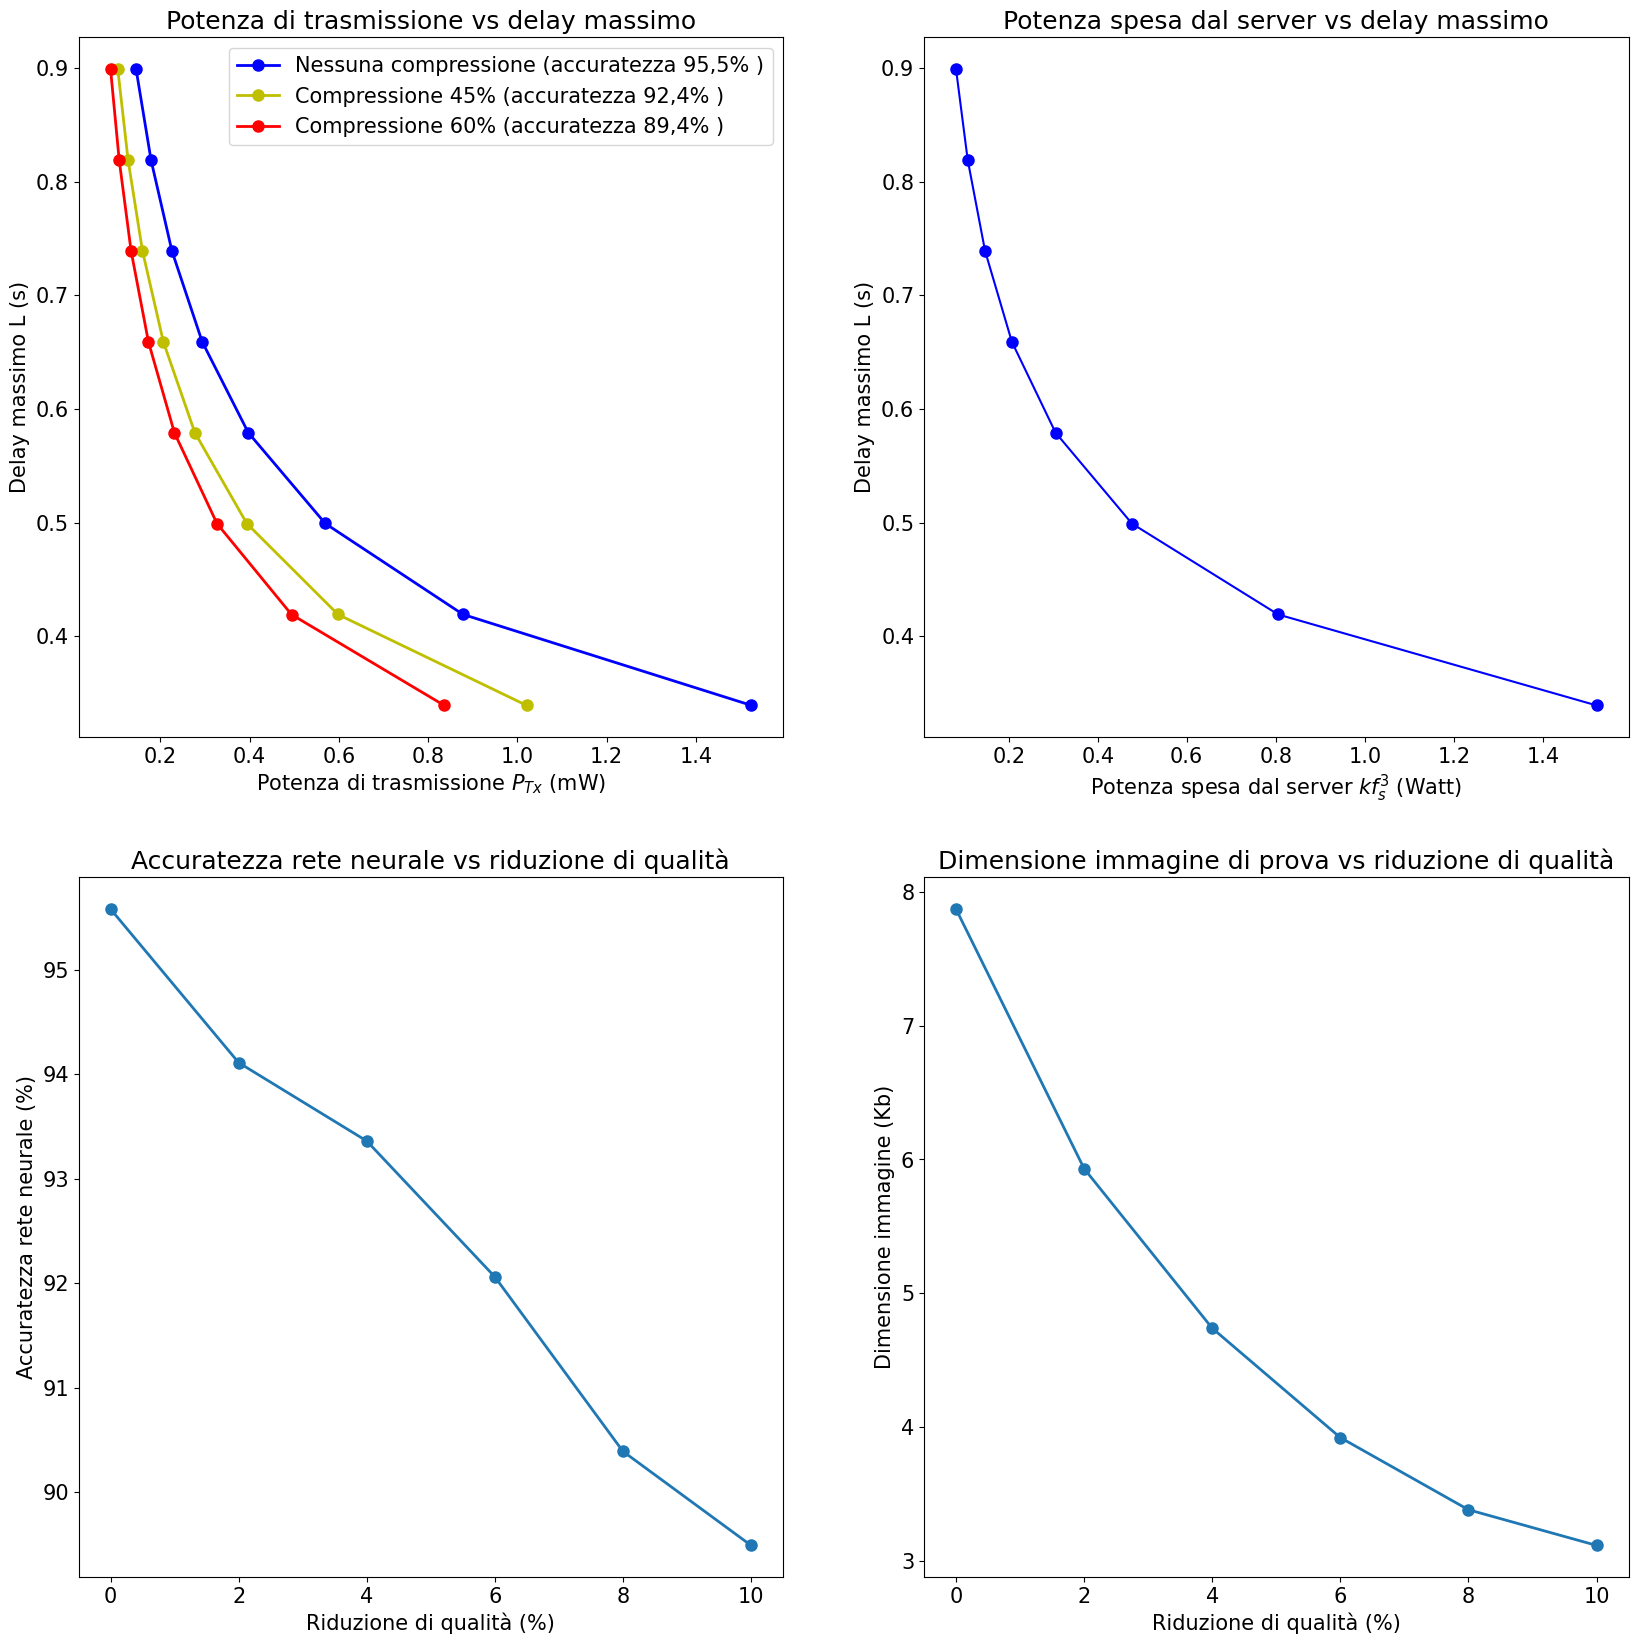

In [12]:
import cvxpy as cp
import matplotlib.pyplot as plt
import math
import mosek

plt.figure(figsize=(15,15))

all_delaysLists = []
all_PtxLists = []
all_FsLists = []
imageSizeListCopy = imageSizeList[:]

    


for i in indexList:
    #Definizione di parametri

    distanza = 0.02                    #Misurata in kilometri
    f_onda_radio = 23                #Misurata in GHz 
    coeff_rumore = 10**(-20.4)      #Coefficiente per poter calcolare la potenza di rumore 

    N = imageSizeListCopy[i]          #Input del calcolo; misurato in MegaByte
    B = 30          #Banda; misurata in MHz

    fmax = 10             #Frequenza massima del server ; La considero misurata in GHz per poter scalare il problema
    k = 1                  #Switched capacitance della CPU; In realtà sarebbe 10^{-27} ma la considero pari a 1 per scalare il problema
    Pmax = 0.1               #Potenza di trasmissione massima; misurata in Watt 


    #Conversione dei parametri
    N = N * 1024 * 1024 * 8                 #Ora N è misurato in bit 

    w = cpuCyclesMean                #CPU cycles necessari per svolgere il calcolo

    w = w / 10**9               #Riduco i numeri per scalare il problema
    N = N / 10**6

    B_Hz = B * 10 ** (6)                       #Converto B in Hz
    f_onda_radio = f_onda_radio * 1000      #Ora f_onda_radio è misurata in MHz


    #Calcolo di altri parametri
    PathLoss_dB = 32.4 + 20*math.log(distanza , 10) + 20*math.log(f_onda_radio, 10)     #Path loss in decibel

    PathLoss = 10 ** (PathLoss_dB / 10)         
    h = 1 / PathLoss                    #Attenuazione di canale; in realtà  h := |h|^{2}

    N0 = coeff_rumore * B_Hz               #Potenza di rumore 



    #Calcolo del valore minimo di L (vincolo di latenza)
    Delta_R_min = w / fmax       #Tempo di elaborazione lato server

    SNR_Max = (Pmax * h)/N0     #Rapporto segnale rumore
    logArg = 1 + SNR_Max

    Max_rate =  B * math.log(logArg , 2 )

    Delta_Tx_min = N / Max_rate         #Tempo di trasmissione

    L_Min = Delta_Tx_min + Delta_R_min      

    print("PathLoss in dB:" , PathLoss_dB)
    print("PathLoss scalare: " , PathLoss )
    print("Attenuazione di canale: " , h)
    print("Potenza di rumore: " +  str(N0) + " Watt"   )
    print("Cpu cycles necessari: " +  str(w * 10**(9)) + " Cpu-cycles"  )
    print("Banda :" + str(B * 10**6) + " Hz" )
    print("Num bit: " + str(imageSizeListCopy[i] * 1024 * 1024 * 8) + " bit"   )
    print("Rapporto segnale rumore max: " , SNR_Max  )
    print("Tempo esecuzione server: " + str(Delta_R_min) + " s" )
    print("Tempo trasmissione: " + str(Delta_Tx_min) + " s"  )
    print("Valore minimo di L: " + str(L_Min) + " s"   )

    print("\n" * 3)


    L = cp.Parameter(nonneg=True)
    time = 0.3

    #Creo le due variabili del problema 
    P_tx = cp.Variable()
    fs = cp.Variable()  
            

    #Creo i vincoli 
    Delta_R = w * (fs**(-1))

    x = 1 / N0

    SNR = (P_tx * h) * x

    y = 1 / math.log(2 , math.e)
    Rate = B * (cp.log(1 + SNR) * y)


    Delta_Tx = N * (Rate ** (-1))

    constraints =[    
        0 <= P_tx,
        P_tx <= Pmax,
        0 <= fs,
        fs <= fmax,
        Delta_Tx + Delta_R <= L
    ]

    obj = cp.Minimize(0.5*P_tx + 0.5*k*(fs**3)) 

    problem = cp.Problem(obj , constraints)

    j = 0
    DelayList = []
    PtxList = []
    FsList = []


    while j < 8:
        L.value = L_Min + time        
        problem.solve()
        
        DelayList.append(L.value)
        PtxList.append(P_tx.value * 10**3)      #Converto Ptx in mW    
        FsList.append(k*(fs.value**3))

        time = time + 0.08
        j+=1

    all_delaysLists.append(DelayList)
    all_PtxLists.append(PtxList)
    all_FsLists.append(FsList)


plt.rcParams.update({'font.size': 15})

plt.subplots(2,2, figsize=(20,20))

plt.subplot(221)

plt.plot(all_PtxLists[0] , all_delaysLists[0] , 'b' , linewidth=2.0 , label='Nessuna compressione (accuratezza 95,5% )' , marker="o" , markersize=8)
plt.plot(all_PtxLists[1] , all_delaysLists[1] , 'y', linewidth=2.0 , label='Compressione 45% (accuratezza 92,4% )' , marker="o" , markersize=8)
plt.plot(all_PtxLists[2] , all_delaysLists[2] , 'r' , linewidth=2.0 , label='Compressione 60% (accuratezza 89,4% ) ' , marker="o" , markersize=8)

plt.xlabel(r'Potenza di trasmissione $P_{Tx}$ (mW)')
plt.ylabel('Delay massimo L (s)')
plt.legend(loc='upper right')

plt.title('Potenza di trasmissione vs delay massimo')


plt.subplot(222)
plt.plot(all_FsLists[0] , all_delaysLists[0] ,  'b' , marker="o", markersize=8)
plt.xlabel(r'Potenza spesa dal server $kf_s^3$ (Watt)')
plt.ylabel('Delay massimo L (s)')

plt.title('Potenza spesa dal server vs delay massimo')


compressionList = [0,2,4,6,8,10]
accuracyListCopy = accuracyList[:]
accuracyListCopy.pop(3)

plt.subplot(223)
plt.plot(compressionList , [item * 100 for item in accuracyListCopy]  , linewidth=2.0 , marker="o" , markersize=8)

plt.ylabel('Accuratezza rete neurale (%)')
plt.xlabel('Riduzione di qualità (%)')

plt.title('Accuratezza rete neurale vs riduzione di qualità')


print(imageSizeList[0] * 1024  )
print(imageSizeListCopy.pop(3) * 1024  )
print(imageSizeListCopy[5] * 1024)   

plt.subplot(224)

plt.plot(compressionList , [item * 1024 for item in imageSizeListCopy] , linewidth=2.0 , marker="o" , markersize=8)

plt.ylabel('Dimensione immagine (Kb)')
plt.xlabel('Riduzione di qualità (%)')

plt.title('Dimensione immagine di prova vs riduzione di qualità')


plt.subplots_adjust(wspace=0.2)




plt.show()